# Data pre-processing


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


In [14]:
data_csv = pd.read_csv('stroke.csv', sep=';')
data_csv.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
data_csv = data_csv.dropna(subset=['bmi'])
data_csv['ever_married'] = data_csv['ever_married'].map({'Yes': 1, 'No': 0})
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status']
data_csv = pd.get_dummies(data_csv, columns=categorical_columns)
data_csv.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.6,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,1,171.23,34.4,1,1,0,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,1,174.12,24.0,1,1,0,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,1,186.21,29.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0


In [16]:
print(data_csv['stroke'].value_counts())

0    4699
1     209
Name: stroke, dtype: int64


As we can see in our data, we have only 209 cases of sick individuals, whereas there are as many as 4699 cases of healthy individuals. This situation might lead to an incorrect estimation by the model, as the model could learn that almost every patient is sick. To avoid such a scenario, several methods can be applied. The basic ones include undersampling and oversampling. Additionally, more advanced methods like SMOTE (Synthetic Minority Over-sampling Technique) can be utilized. In our case, we will use the latter technique because, in the case of classifying a serious disease, it is crucial to avoid losing information that could be pivotal in detecting rare but important cases. SMOTE generates synthetic samples for the class with fewer instances while maintaining the characteristics of the majority class. This means that we do not lose the original data and there is no risk of losing important information.

In [17]:
X_tmp = data_csv.drop(['stroke'], axis=1)
y_tmp = data_csv['stroke']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tmp, y_tmp)
data_balanced = pd.concat([X_resampled, y_resampled], axis=1)
print(data_balanced['stroke'].value_counts() )
X_resampled.head()

1    4699
0    4699
Name: stroke, dtype: int64


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.6,0,1,0,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,1,105.92,32.5,0,1,0,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,1,171.23,34.4,1,0,0,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,1,174.12,24.0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,1,186.21,29.0,0,1,0,0,1,0,0,0,1,0,1,0,0


Splitting into training and testing set.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)



Standardization and normalization of data

In [19]:
standardScaler = StandardScaler()
X_train_standarized = standardScaler.fit_transform(X_train)
X_test_standarized = standardScaler.transform(X_test)

minMaxScaler = MinMaxScaler(feature_range=(0,1))
X_train_normalized = minMaxScaler.fit_transform(X_train)
X_test_normalized = minMaxScaler.fit_transform(X_test)

#  KNN

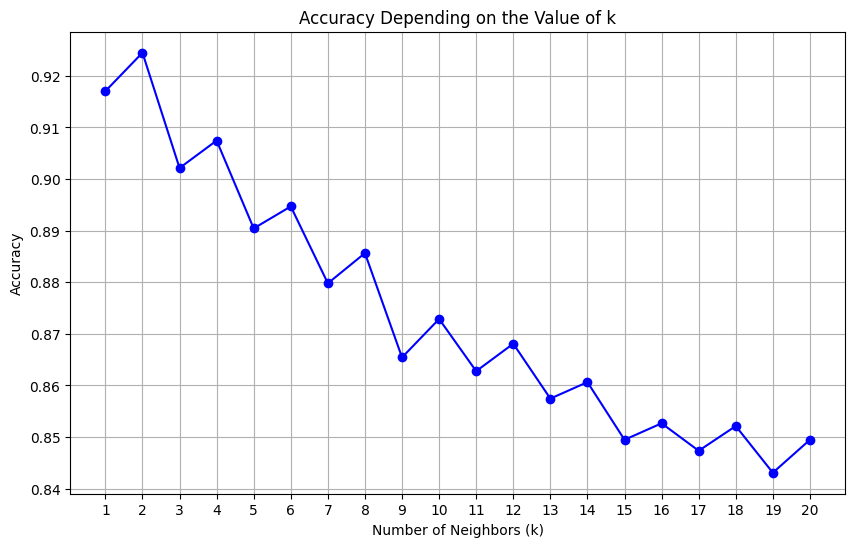

k=1, Dokładność: 0.9170212765957447
k=2, Dokładność: 0.924468085106383
k=3, Dokładność: 0.902127659574468
k=4, Dokładność: 0.9074468085106383
k=5, Dokładność: 0.8904255319148936
k=6, Dokładność: 0.8946808510638298
k=7, Dokładność: 0.8797872340425532
k=8, Dokładność: 0.8856382978723404
k=9, Dokładność: 0.8654255319148936
k=10, Dokładność: 0.872872340425532
k=11, Dokładność: 0.8627659574468085
k=12, Dokładność: 0.8680851063829788
k=13, Dokładność: 0.8574468085106383
k=14, Dokładność: 0.8606382978723405
k=15, Dokładność: 0.8494680851063829
k=16, Dokładność: 0.8526595744680852
k=17, Dokładność: 0.8473404255319149
k=18, Dokładność: 0.8521276595744681
k=19, Dokładność: 0.8430851063829787
k=20, Dokładność: 0.8494680851063829


In [20]:

k_values = []
accuracy_values = []

# Conducting simulations for various values of k
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    k_values.append(k)
    accuracy_values.append(accuracy)


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Accuracy Depending on the Value of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Wyświetlenie wyników
for k, accuracy in zip(k_values, accuracy_values):
    print(f'k={k}, Dokładność: {accuracy}')

Comparison of the KNN algorithm on data without standardization and with standardization.

In [21]:
# Data standardization
standardScaler = StandardScaler()
X_train_standardized = standardScaler.fit_transform(X_train)
X_test_standardized = standardScaler.transform(X_test)

# Initializing the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model on standardized data
knn.fit(X_train_standardized, y_train)

# Predicting on standardized data
y_pred_standardized = knn.predict(X_test_standardized)

# Calculating the accuracy of the standardized model
accuracy_standardized = accuracy_score(y_test, y_pred_standardized)

# Training the model on non-standardized data
knn.fit(X_train, y_train)

# Predicting on non-standardized data
y_pred = knn.predict(X_test)

# Calculating the accuracy of the non-standardized model
accuracy = accuracy_score(y_test, y_pred)

# Comparing the results
print("Accuracy of the standardized model: {:.2f}%".format(accuracy_standardized * 100))
print("Accuracy of the non-standardized model: {:.2f}%".format(accuracy * 100))


Accuracy of the standardized model: 96.49%
Accuracy of the non-standardized model: 89.04%


The impact of the dataset size

In [22]:
sample_sizes = [100, 500, 1000, 2000, 4000]

for sample_size in sample_sizes:
    # Select a subset of data with a specified size
    data_subset = data_csv.sample(n=sample_size, random_state=1)

    # Prepare data (as in your previous code)

    # Data standardization
    standardScaler = StandardScaler()
    X_train_standarized = standardScaler.fit_transform(X_train)
    X_test_standarized = standardScaler.transform(X_test)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

    # Initialize the KNN model
    knn = KNeighborsClassifier(n_neighbors=2)

    # Train the model
    knn.fit(X_train_standarized, y_train)

    # Prediction
    y_pred = knn.predict(X_test_standarized)

    # Calculate model accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print("Dataset Size:", sample_size)
    print("Accuracy of KNN model with standardization:", accuracy)
    print()


Dataset Size: 100
Accuracy of KNN model with standardization: 0.9680851063829787

Dataset Size: 500
Accuracy of KNN model with standardization: 0.9680851063829787

Dataset Size: 1000
Accuracy of KNN model with standardization: 0.9680851063829787

Dataset Size: 2000
Accuracy of KNN model with standardization: 0.9680851063829787

Dataset Size: 4000
Accuracy of KNN model with standardization: 0.9680851063829787



#KKNN

In [23]:
k = 5
kknn = KNeighborsClassifier(n_neighbors=k)
kknn.fit(X_train_standarized, y_train)
# Prediction
y_pred_KKNN = kknn.predict(X_test_standarized)

Error matrix and measures for the model

Due to the medical problem, we will focus on accuracy and sensitivity

In [24]:
print(confusion_matrix(y_test, y_pred_KKNN))

[[906  24]
 [ 42 908]]


In [25]:
accuracy = accuracy_score(y_test, y_pred_KKNN)
conf_matrix = confusion_matrix(y_test, y_pred_KKNN)
tn, fp, fn, tp = conf_matrix.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


metrics_df = pd.DataFrame({
    'Accuracy': [accuracy],
    'Specificity': [specificity],
    'Sensitivity': [sensitivity],
})

print(metrics_df)


   Accuracy  Specificity  Sensitivity
0  0.964894     0.974194     0.955789


Evaluation for different sizes of data set and creation of a chart

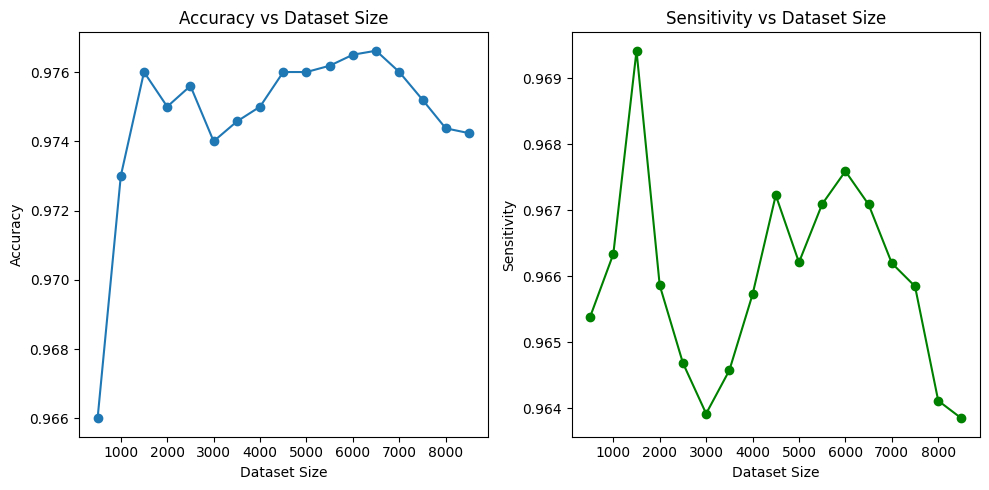

In [26]:
sample_sizes = list(range(500, 9000, 500))
accuracies = []
sensitivities = []

for sample_size in sample_sizes:
    # Splitting the dataset into a sample of a specific size
    X_sample, _, y_sample, _ = train_test_split(X_resampled, y_resampled, train_size=sample_size, random_state=10)
    X_sample = standardScaler.transform(X_sample)  # Transform the sample using the standard scaler
    y_sample_pred = kknn.predict(X_sample)  # Predict using the KNN classifier
    accuracy_sample = accuracy_score(y_sample, y_sample_pred)  # Calculate accuracy for the sample
    sensitivity_sample = confusion_matrix(y_sample, y_sample_pred)[1, 1] / (
                confusion_matrix(y_sample, y_sample_pred)[1, 1] + confusion_matrix(y_sample, y_sample_pred)[1, 0])
    accuracies.append(accuracy_sample)  # Append accuracy of the sample
    sensitivities.append(sensitivity_sample)  # Append sensitivity of the sample

# Plotting accuracy and sensitivity against the dataset size
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(sample_sizes, accuracies, marker='o')  # Plot accuracy against dataset size
plt.title('Accuracy vs Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(sample_sizes, sensitivities, marker='o', color='green')  # Plot sensitivity against dataset size
plt.title('Sensitivity vs Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Sensitivity')

plt.tight_layout()
plt.show()


# Logistic Regression

In [29]:
# Variables after standardization
logregS = LogisticRegression()
logregS.fit(X_train_standarized , y_train)
y_pred_LR_standarized = logregS.predict(X_test_standarized)
conf_matrix_of_standarized = confusion_matrix(y_test, y_pred_LR_standarized)
tn, fp, fn, tp = conf_matrix_of_standarized.ravel()

accuracy_standarized = (tp + tn) / (tp + tn + fp + fn)
sensitivity_standarized = tp / (tp + fn)

# Variables before standardization
logregD = LogisticRegression()
logregD.fit(X_train , y_train)
y_pred_LR = logregD.predict(X_test)
conf_matrix1 = confusion_matrix(y_test, y_pred_LR)
tn1, fp1, fn1, tp1 = conf_matrix1.ravel()

accuracy = (tp1 + tn1) / (tp1 + tn1 + fp1 + fn1)
sensitivityStandarized = tp1 / (tp1 + fn1)

print("Variables before standardization:\n")
print(conf_matrix1)
print("Accuracy is "+str(accuracy))
print("Variables after standardization:\n")
print(conf_matrix_of_standarized)
print("Accuracy is "+str(accuracy_standarized))


Variables before standardization:

[[895  35]
 [ 61 889]]
Accuracy is 0.948936170212766
Variables after standardization:

[[920  10]
 [ 70 880]]
Accuracy is 0.9574468085106383


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wersja ze standaryzacją ale bez outlierów

In [30]:
# Removing outliers
def remove_outliers_zscore(data, columns_to_check, threshold=3):
    for column in columns_to_check:
        z_scores = (data[column] - data[column].mean()) / data[column].std()
        outliers = (z_scores > threshold) | (z_scores < -threshold)
        data = data[~outliers]
    return data

# Selecting columns for analysis
columns_to_check = ['age', 'avg_glucose_level', 'bmi']

# Removing outliers
data_balanced_no_outliers = remove_outliers_zscore(data_balanced.copy(), columns_to_check)

# Splitting data into training and testing sets
data_balanced_no_outliers_train = data_balanced_no_outliers.sample(frac=0.8, random_state=42)
data_balanced_no_outliers_test = data_balanced_no_outliers.drop(data_balanced_no_outliers_train.index)

# Preparing data
X_train_no_outliers = data_balanced_no_outliers_train.drop('stroke', axis=1)
y_train_no_outliers = data_balanced_no_outliers_train['stroke']

X_test_no_outliers = data_balanced_no_outliers_test.drop('stroke', axis=1)
y_test_no_outliers = data_balanced_no_outliers_test['stroke']

# Standardizing data
scaler = StandardScaler()
X_train_normalizedRL = scaler.fit_transform(X_train_no_outliers)
X_test_normalizedRL = scaler.transform(X_test_no_outliers)

# Initializing logistic regression model
logreg = LogisticRegression()

# Training the model
logreg.fit(X_train_normalizedRL, y_train_no_outliers)

# Prediction on the test set
y_pred_LR = logreg.predict(X_test_normalizedRL)

# Calculating the confusion matrix
conf_matrixRL2 = confusion_matrix(y_test_no_outliers, y_pred_LR)
tnRL2, fpRL2, fnRL2, tpRL2 = conf_matrixRL2.ravel()
print(conf_matrixRL2)

# Calculating accuracy and sensitivity
accuracyRL2 = (tpRL2 + tnRL2) / (tpRL2 + tnRL2 + fpRL2 + fnRL2)
sensitivityRL2 = tpRL2 / (tpRL2 + fnRL2)

# Displaying results
print(f'Accuracy: {accuracyRL2}')
print(f'Sensitivity: {sensitivityRL2}')
print(f'Sensitivity with outliers: {sensitivityStandarized}')


[[938   4]
 [ 80 838]]
Accuracy: 0.9548387096774194
Sensitivity: 0.9128540305010894
Sensitivity with outliers: 0.9357894736842105


#ROC curve and AUC value

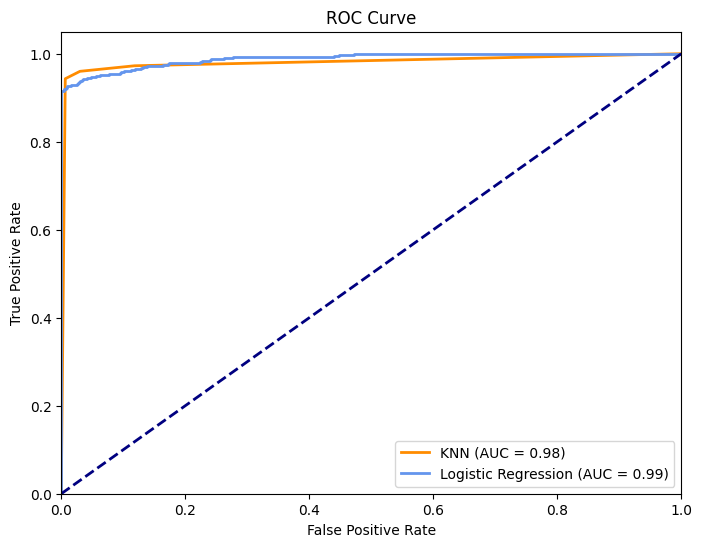

In [33]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

# Data standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Initializing the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Calculating predicted class probabilities
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Calculating ROC curves and AUC values
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plotting ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_logreg, tpr_logreg, color='cornflowerblue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
